Enter the number of bedrooms: 4
Enter the number of bathrooms: 5
Enter the size of the house (in sqft): 25000
Enter the lot size (in sqft): 30000
Enter the zip code: 98745


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted price for the input: $11126818.95

Mean Absolute Error: 273320.4326795493
Mean Squared Error: 835196482798.8082
Root Mean Squared Error: 913890.8484052175


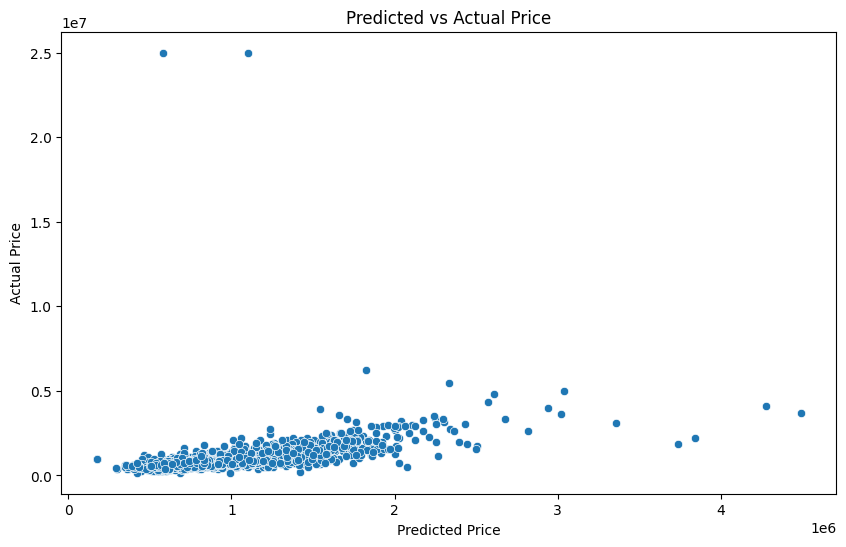

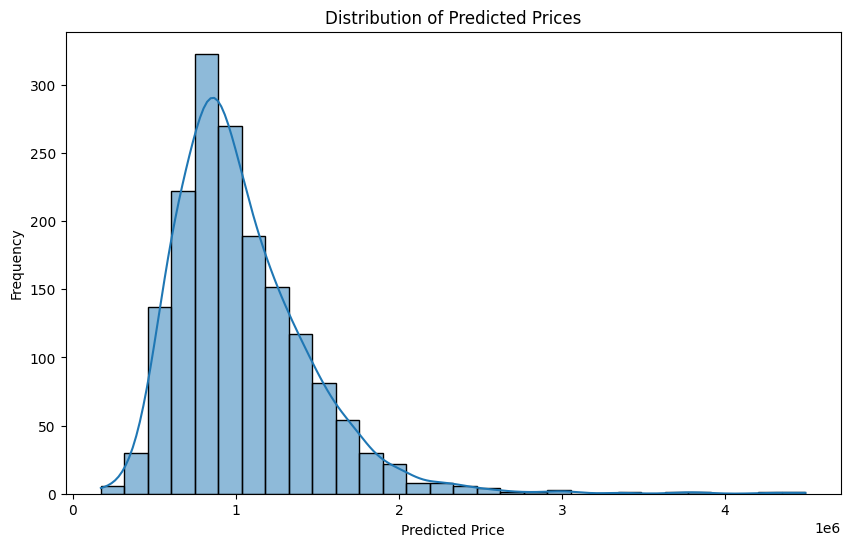

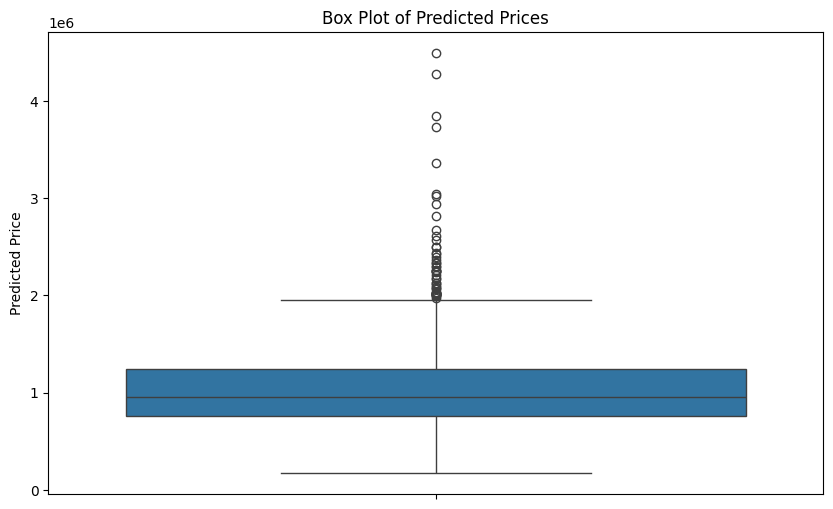

<Figure size 1000x600 with 0 Axes>

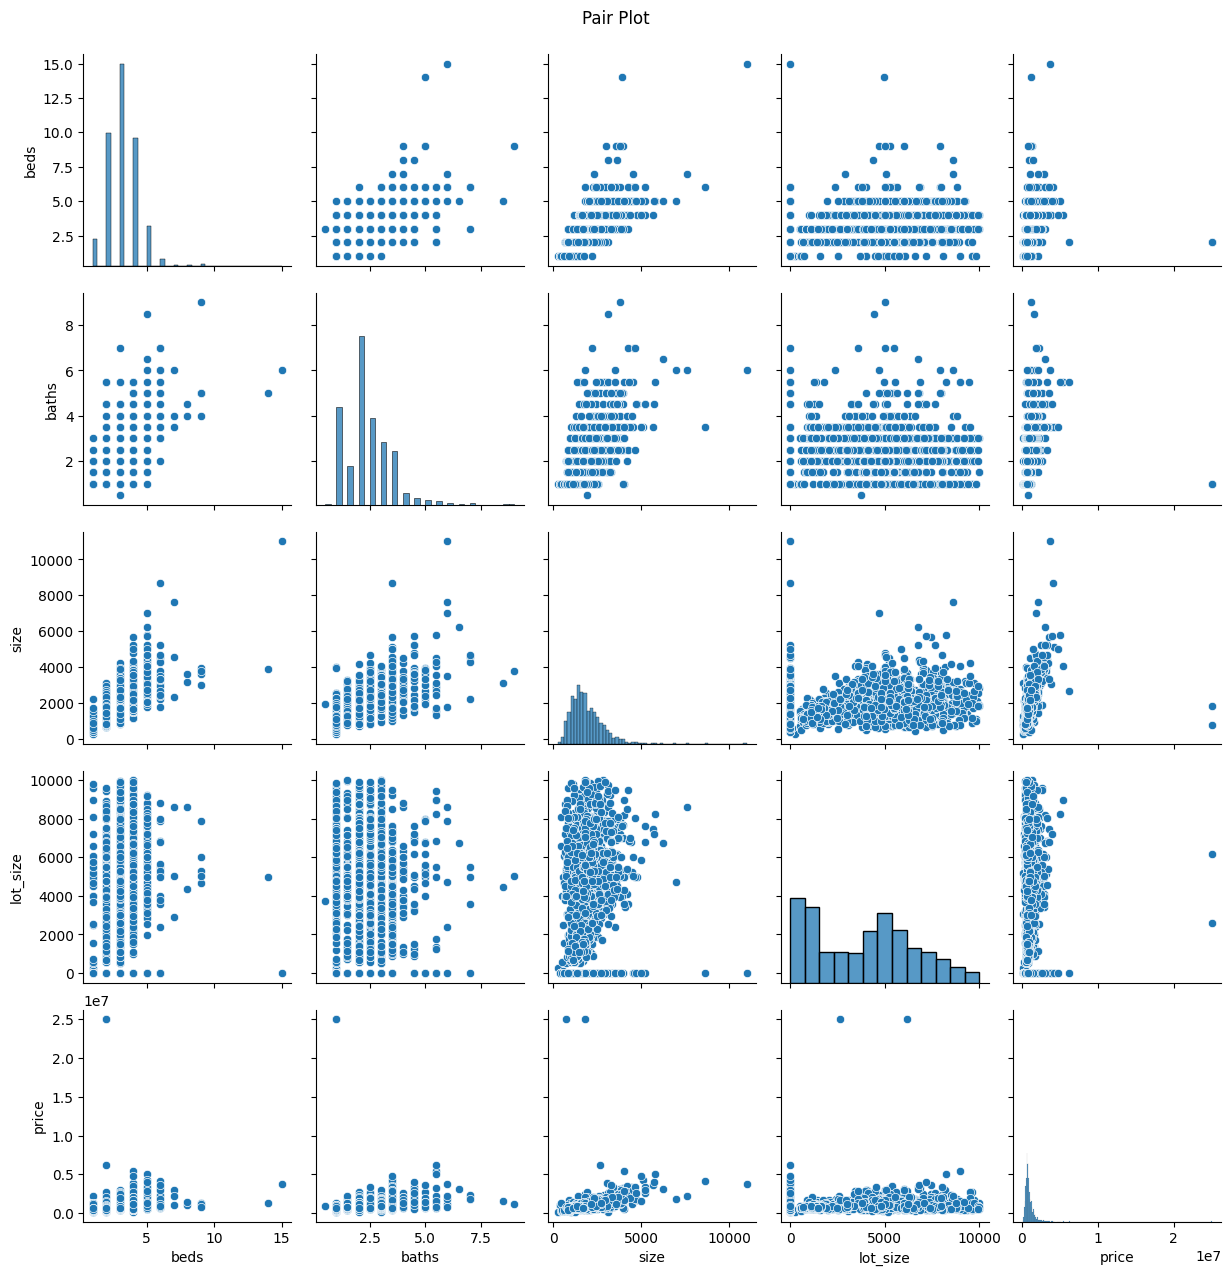

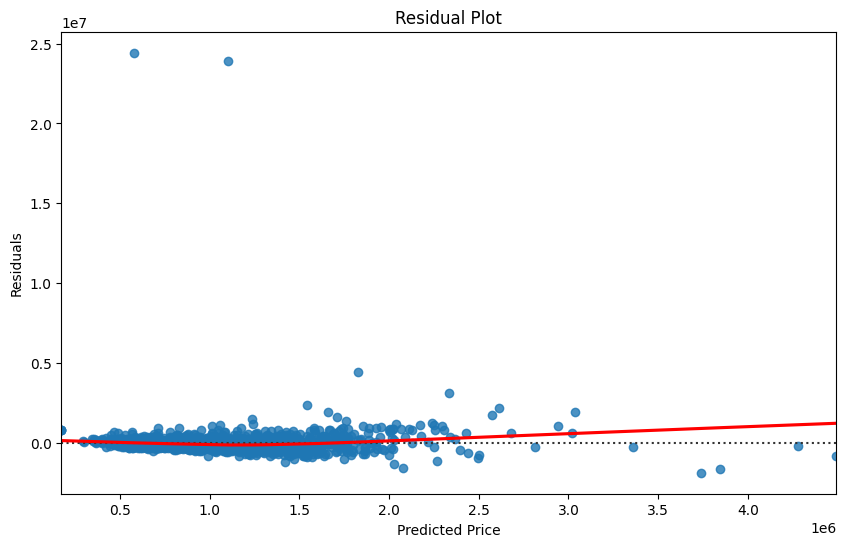


Uses of each visualization:
1. Scatter Plot (Predicted vs Actual Price): Shows how well the model predictions align with the actual prices.
2. Histogram (Distribution of Predicted Prices): Visualizes the distribution of predicted prices.
3. Box Plot (Box Plot of Predicted Prices): Provides a summary of the distribution of predicted prices, including outliers.
4. Pair Plot: Visualizes pairwise relationships between different features and the target variable.
5. Residual Plot: Examines the residuals to check if the model meets the assumptions of linear regression.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('train.csv')

# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

# Extract features and target variable
X = data[['beds', 'baths', 'size', 'lot_size', 'zip_code']]
y = data['price']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Function to make predictions for given input
def predict_price(beds, baths, size, lot_size, zip_code):
    input_data = np.array([beds, baths, size, lot_size, zip_code]).reshape(1, -1)
    predicted_price = model.predict(input_data)[0]
    return predicted_price

# Take input from the user
beds = int(input("Enter the number of bedrooms: "))
baths = float(input("Enter the number of bathrooms: "))
size = float(input("Enter the size of the house (in sqft): "))
lot_size = float(input("Enter the lot size (in sqft): "))
zip_code = int(input("Enter the zip code: "))

# Predict price for the input
predicted_price = predict_price(beds, baths, size, lot_size, zip_code)
print(f"Predicted price for the input: ${predicted_price:.2f}")

# Prepare input data for visualizations
input_data = {'beds': [beds], 'baths': [baths], 'size': [size], 'lot_size': [lot_size], 'zip_code': [zip_code]}
input_df = pd.DataFrame(input_data)

# Model Evaluation
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f'\nMean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=y)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Predicted vs Actual Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=30, kde=True)
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y_pred)
plt.ylabel('Predicted Price')
plt.title('Box Plot of Predicted Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.pairplot(data[['beds', 'baths', 'size', 'lot_size', 'price']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Comment about the uses of each graph
print("\nUses of each visualization:")
print("1. Scatter Plot (Predicted vs Actual Price): Shows how well the model predictions align with the actual prices.")
print("2. Histogram (Distribution of Predicted Prices): Visualizes the distribution of predicted prices.")
print("3. Box Plot (Box Plot of Predicted Prices): Provides a summary of the distribution of predicted prices, including outliers.")
print("4. Pair Plot: Visualizes pairwise relationships between different features and the target variable.")
print("5. Residual Plot: Examines the residuals to check if the model meets the assumptions of linear regression.")
